# 1) 코사인 유사도(Cosine Similarity)

코사인 유사도는 두 벡터가 이루는 코사인 각도를 구해 그 값에 따라 유사도를 판단하는 방식이다.

* cos 이루는 각 180도 : -1
* cos 이루는 각 90도 : 0
* cos 이루는 각 0도 : 1

코사인 유사도의 값은 -1< Cosine <1 의 값의 범위를 가지며, 1에 가까울 수록 두 벡터가 더 유사하다고 판단할 수 있다>

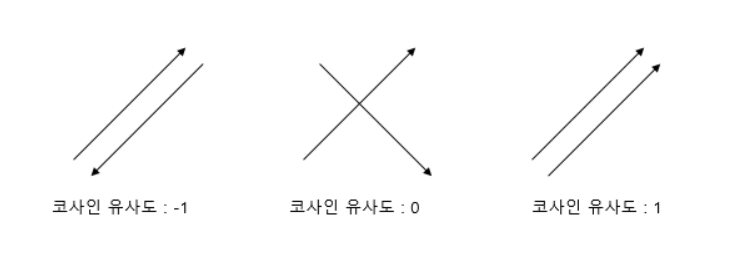

### 2. 유사도를 이용한 추천 시스템 구현하기

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
data = pd.read_csv('movies_metadata.csv/movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


데이터의 양을 조절

In [3]:
data = data.head(20000)

'overview'열에 대한 결측값의 개수 확인

In [4]:
data['overview'].isnull().sum()

135

'overview'열에 대한 결측값을 공백으로 대체

In [5]:
data['overview']= data['overview'].fillna('')

TF-IDF 수행
* 20000개의 영화를 표현하기 위해 13918개의 단어가 사용되었다.

In [39]:
tfidf = TfidfVectorizer(stop_words='english')
#overview에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(data['overview'])
print(tfidf_matrix.shape)

(20000, 47487)


In [40]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) # linear_kernel는 두 벡터의 dot product 이다.

* title 열에서 중복을 제외한 영화 제목들을 indices변수로 받는다.

In [22]:
indices = pd.Series(data.index, index = data['title']).drop_duplicates()
print(indices.head())

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64


* 'Father of the Bride Part II' 라는 영화의 index를 확인해본다.

In [23]:
idx = indices['Father of the Bride Part II']
print(idx)

4


In [58]:
cosine_sim.shape

(20000, 20000)

In [62]:
cosine_sim[1]

array([0.01575748, 1.        , 0.04907345, ..., 0.        , 0.        ,
       0.        ])

In [65]:
def get_recommendations(title, cosine_sim = cosine_sim):
    # 선택한 영화의 타이틀로부터 해당되는 인덱스를 받아옵니다. 이제 선택한 영화를 가지고 연산할 수 있습니다.
    idx = indices[title]
    
    # 모든 영화에 대해서 해당 영화와의 유사도를 구합니다.
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # 유사도에 따라 영화들을 정렬합니다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
     # 가장 유사한 10개의 영화를 받아옵니다.
    sim_scores = sim_scores[1:11]
    
      # 가장 유사한 10개의 영화의 인덱스를 받아옵니다.
    movie_indices = [i[0] for i in sim_scores]
    
        # 가장 유사한 10개의 영화의 제목을 리턴합니다.
    return data['title'].iloc[movie_indices]

In [66]:
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object